In [43]:
import torch
import common.state
import common.datasets
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import lpips
import time
import random

In [58]:
import pickle
with open('./cifar10_normal_path_widths_0_2.pkl', 'rb') as fp:
    a = pickle.load(fp)

In [59]:
max_dists = np.array([[x for _, x in a[0][1][i][1]] for i in range(len(a[0][1]))]).transpose()
min_dists = np.array([[x for x, _ in a[0][1][i][1]] for i in range(len(a[0][1]))]).transpose()

In [60]:
max_dists

array([[1.00000000e+00, 9.99999404e-01, 9.99993801e-01, 9.99976635e-01,
        9.99943972e-01, 9.99842644e-01, 9.99694824e-01, 9.99379516e-01,
        9.98288453e-01, 9.96989071e-01],
       [9.96839941e-01, 9.99701843e-02, 3.47981666e-04, 7.89658952e-06,
        3.68273209e-06, 5.20050662e-06, 3.48041658e-06, 1.20277127e-05,
        2.15624132e-05, 3.66961322e-05],
       [9.27171946e-01, 1.27751026e-02, 1.87831101e-04, 2.30052101e-05,
        2.71507161e-05, 4.47728162e-05, 3.99041346e-05, 6.44985848e-05,
        1.55515867e-04, 2.02627620e-04],
       [2.81307995e-01, 2.92226602e-03, 2.45595438e-04, 6.27583140e-05,
        5.23437229e-05, 1.03848870e-04, 1.04269602e-04, 1.00399790e-04,
        3.56199744e-04, 4.17809730e-04],
       [1.11264743e-01, 3.30024329e-03, 4.02942911e-04, 1.59443560e-04,
        1.67134407e-04, 1.84714299e-04, 2.23131268e-04, 1.91018509e-04,
        3.41806386e-04, 9.17273574e-04],
       [3.44371721e-02, 4.06761700e-03, 5.24531701e-04, 2.05643664e-04,
   

In [61]:
def f(x, y):
    return float(a[0][1][x][1][int(y)][0].squeeze())
def g(x, y):
    return float(a[0][1][x][1][int(y)][1].squeeze())

x = np.arange(len(a[0][1]))
y = np.array([0,5, 7.5, 10, 12.5, 15, 20])
#y =  np.array([0,5, 10, 15, 20, 25, 30])
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z_2 = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = f(X[i][j], Y[i][j]/5)
        Z_2[i][j] = g(X[i][j], Y[i][j]/5)

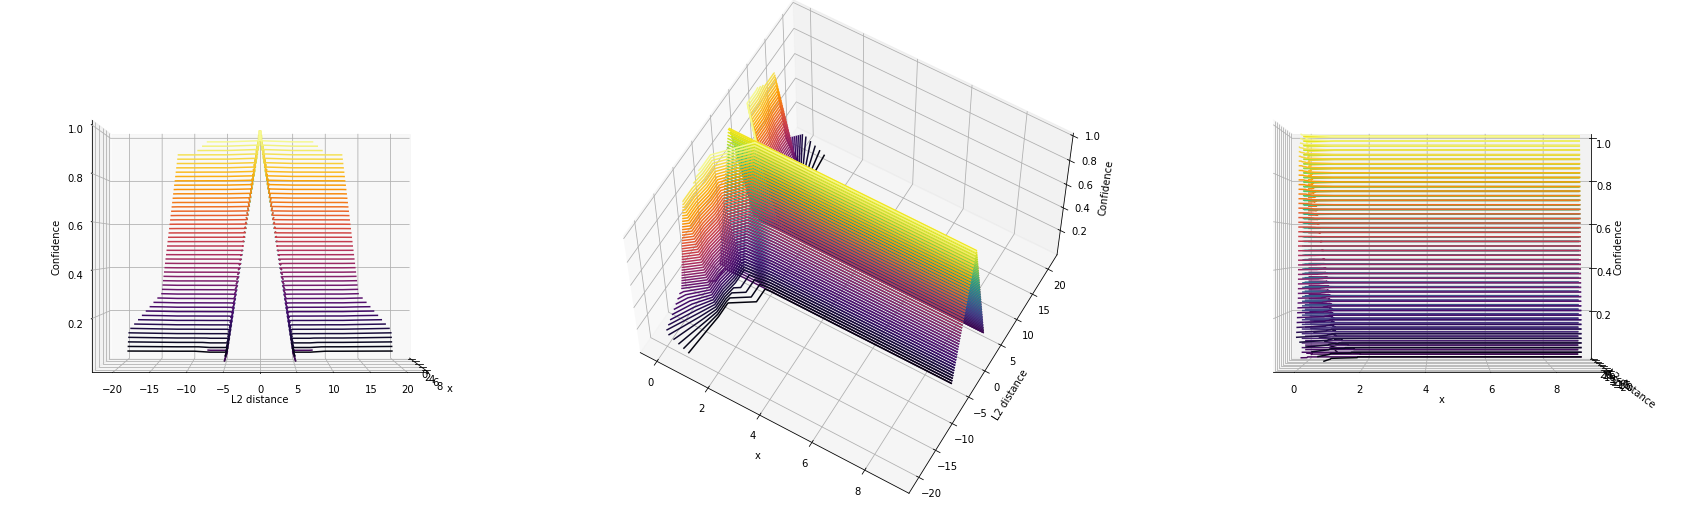

In [62]:

# matplotlib.rcParams.update({'font.serif': 'Times New Roman',
#                                 'font.size': 10.0,
#                                 'axes.labelsize': 'Medium',
#                                 'axes.labelweight': 'normal',
#                                 'axes.linewidth': 0.8,
#                                  ###########################################
#                                  # THIS IS THE IMPORTANT ONE FOR STRETCHING
#                                  # default is [6,4] but...i changed it to
#                                 'figure.figsize':[25,5]   # THIS ONE #
#                               })
fig = plt.figure(figsize=(30,10))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='viridis')
    ax.contour3D(X, -Y, Z, 50, cmap='viridis')
    ax.contour3D(X, Y, Z_2, 50, cmap='inferno')
    ax.contour3D(X, -Y, Z_2, 50, cmap='inferno')

#     x_scale=30
#     y_scale=10
#     z_scale=10

#     scale=np.diag([x_scale, y_scale, z_scale, 1.0])
# #     scale=scale*(1.0/scale.max())
# #     scale[3,3]=1.0
#     from mpl_toolkits.mplot3d.axes3d import Axes3D

#     def short_proj():
#         return np.dot(Axes3D.get_proj(ax), scale)

#     ax.get_proj=short_proj
#     ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), scale)

    ax.set_xlabel('x')
    ax.set_ylabel('L2 distance')
    ax.set_zlabel('Confidence')
    if i == 0:
        ax.view_init(0, 0)
    if i == 1:
        ax.view_init(60, -60)
    if i == 2:
        ax.view_init(0,-90)
plt.show()

In [56]:
pip install -U matplotlib

Note: you may need to restart the kernel to use updated packages.


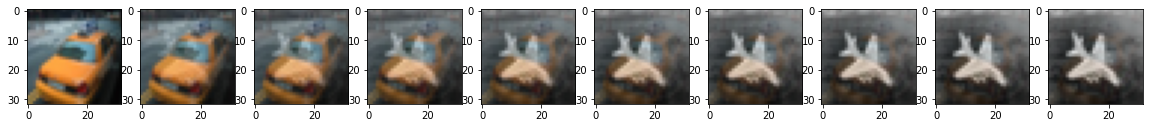

In [63]:
f, axarr = plt.subplots(1,len(a[0][1]), figsize=(20,2)) 
_ = [axarr[i].imshow(a[0][1][i][0].squeeze().permute(1,2,0)) for i in range(len(a[0][1]))]

In [15]:
loss_fn_alex = lpips.LPIPS(net='alex') # best forward scores
loss_fn_vgg = lpips.LPIPS(net='vgg') # closer to "traditional" perceptual loss, when used for optimization


/fs/classhomes/fall2021/cmsc828w/cs828w04/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /fs/classhomes/fall2021/cmsc828w/cs828w04/anaconda3/lib/python3.8/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /fs/classhomes/fall2021/cmsc828w/cs828w04/anaconda3/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth


In [21]:
loss_fn_alex(torch.ones(3,31,31), -torch.ones(10,3,31,31)).shape

torch.Size([10, 1, 1, 1])

In [22]:
a.min()

tensor(-1.)

In [3]:
def visualize(inp, reshape=False):
    if reshape:
        inp = torch.stack((inp[0], inp[1], inp[2] ), dim=-1)
    return Image.fromarray((255*inp.numpy()).astype(np.uint8))

In [23]:
#def construct_image(model, input_shape, target_class):
at_model = common.state.State.load('examples/readme/cifar10_at/classifier.pth.tar')
ccat_model = common.state.State.load('examples/readme/cifar10_ccat/classifier.pth.tar')
msd_model = common.state.State.load('examples/readme/cifar10_msd/classifier.pth.tar')

/fs/classhomes/fall2021/cmsc828w/cs828w04/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
batch_size = 1
train_dataset = torch.utils.data.DataLoader(common.datasets.Cifar10TrainSet(), batch_size=batch_size, shuffle=False, num_workers=0)
test_dataset = torch.utils.data.DataLoader(common.datasets.Cifar10TestSet(), batch_size=batch_size, shuffle=False, num_workers=0)

[161021181715|0/0MiB] read /fs/classhomes/fall2021/cmsc828w/cs828w04/confidence-calibrated-adversarial-training/Cifar10/train_images.h5
[161021181715|0/0MiB] read /fs/classhomes/fall2021/cmsc828w/cs828w04/confidence-calibrated-adversarial-training/Cifar10/train_labels.h5


/fs/classhomes/fall2021/cmsc828w/cs828w04/anaconda3/lib/python3.8/site-packages/torch/cuda/memory.py:373: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(
/fs/classhomes/fall2021/cmsc828w/cs828w04/anaconda3/lib/python3.8/site-packages/torch/cuda/memory.py:381: FutureWarning: torch.cuda.max_memory_cached has been renamed to torch.cuda.max_memory_reserved
  warnings.warn(


[161021181717|0/0MiB] read /fs/classhomes/fall2021/cmsc828w/cs828w04/confidence-calibrated-adversarial-training/Cifar10/test_images.h5
[161021181717|0/0MiB] read /fs/classhomes/fall2021/cmsc828w/cs828w04/confidence-calibrated-adversarial-training/Cifar10/test_labels.h5


In [3]:
classes = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',]

In [7]:
def get_nullspace_projection(J, v):
    y_hat = torch.sum(J*v, -1, keepdim=True)/torch.sum(J * J, -1,  keepdim=True)
    x = v - (J * y_hat)
#     print(torch.matmul(J, x))
    return x

In [8]:
a = torch.rand(10,3)

In [9]:
torch.inner(a, a).shape

torch.Size([10, 10])

In [10]:
def old_get_nullspace_projection(J, v):
#     a = time.time()
    J_t = J.transpose(-1,-2)
    y_hat = torch.linalg.solve( torch.einsum('bij,bjk->bik', J, J_t), torch.einsum('bij,bj->bi', J, v))
    x = v - torch.einsum('bij,bj->bi', J_t, y_hat)
#     print(torch.matmul(J, x))
    return x

In [11]:
def get_random_nullvector(J):
    a, b = J.shape[0], J.shape[1] # a < b
    rand_vec = torch.randn(b - a).to(J.device)
    perm = torch.randperm(b)
    indices_1, indices_2 = perm[:b-a], perm[b-a:]
    res = torch.matmul(J[:,indices_1], rand_vec)
    rem = torch.linalg.solve(J[:, indices_2], -res)
    null_vec = torch.zeros(b).to(J.device)
    null_vec[indices_1] = rand_vec
    null_vec[indices_2] = rem
    null_vec = null_vec/torch.linalg.norm(null_vec)
#     print(torch.matmul(J, null_vec))
    return null_vec

In [12]:
model = msd_model.model
input_shape = (1, 3, 32, 32)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
softmax = torch.nn.Softmax(dim=-1)
relu = torch.nn.ReLU()
print(device)
model.to(device)
for p in model.parameters():
    p.requires_grad = False
# target_class = torch.LongTensor([target_class]).to(device)
# loss_fn = torch.nn.CrossEntropyLoss()
#inp = torch.ones(*input_shape[2:], requires_grad=True, device=device)
# optimizer = torch.optim.Adam([inp], lr=1e-3)

cuda


In [13]:
def batch_nullspace_attack(dataset, source_classes, model, stepsize, target_image, iterations, device, order=1, inp=None):
    # target_image = torch.ones(inp.shape, device=device).reshape((-1))
    source_image = common.torch.as_variable(dataset, False)
    source_image = source_image.permute(0, 3, 1, 2).to(device)
    source_classes = source_classes.to(device)
    if inp is None:
        inp = source_image.clone().to(device)
        inp.requires_grad_()
        
    target_image = common.torch.as_variable(target_image, False)
    target_image = target_image.permute(2, 0, 1).to(device)
    
    print(source_image.shape, target_image.shape)
    indices = torch.arange(len(inp))
    #print("Initially: ",torch.max(probs), torch.argmax(probs), torch.linalg.norm(inp.clamp(0,1) - target_image.clamp(0,1)))
    
    for i in range(iterations):
#         print(i)
        b = time.time()
#         inp = torch.rand(*inp.shape).to(device)
#         inp.requires_grad_()
        pred = model((inp).clamp(0,1))
        probs = softmax(pred)
        torch.sum(probs[indices,source_classes]).backward()
#         print(time.time() - b)
        J = inp.grad.reshape(len(probs), prod(inp.shape[1:]))
        v = target_image.flatten() - inp.flatten(start_dim=1)
        null_vec = get_nullspace_projection(J, v).reshape(inp.shape)
        new_inp = inp + stepsize*null_vec
        pred_classes = torch.argmax(model(new_inp.clamp(0,1)), dim=-1)
        mask = (pred_classes == source_classes).unsqueeze(-1).unsqueeze(-1).unsqueeze(-1)
#         print(mask.shape, inp.shape, new_inp.shape)
        inp = (inp*(~mask) + new_inp*mask).detach()
        inp.requires_grad_()
#         print(time.time() - b)
#         print(i, probs, stepsize*torch.linalg.norm(null_vec))
#     pred = model(inp.clamp(0,1))
#     probs = softmax(pred)
#     print(target_image.shape)
#     print("Finally: ",torch.max(probs), classes[torch.argmax(probs)], loss_fn_alex(target_image.cpu(), inp.cpu()))
    return inp

In [14]:
dataset = test_dataset
data_dict = dict([(i, list()) for i in range(10)])
for img, label in dataset:
    data_dict[int(label[0])].append(img)

dataset_per_class = torch.stack([torch.stack(imgs) for i, imgs in data_dict.items()])
dataset_per_class = dataset_per_class.squeeze()

In [15]:
target_img_indices = [np.random.randint(len(d)) for d in dataset_per_class]
print(target_img_indices)
target_images = [dataset_per_class[i, target_img_indices[i]] for i in range(10)]

[332, 423, 199, 725, 714, 328, 473, 863, 325, 733]


In [16]:
img_visuals = [visualize(img) for img in target_images]

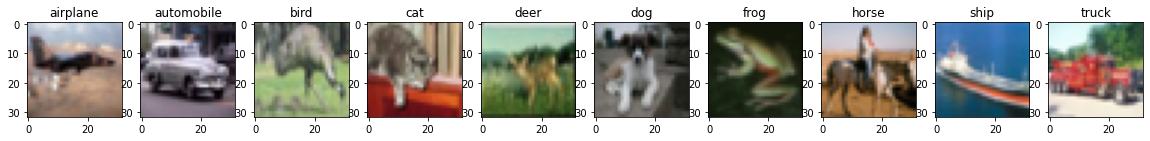

In [17]:
f, axarr = plt.subplots(1,10, figsize=(20,2)) 
_ = [axarr[i].imshow(img_visuals[i]) for i in range(10)]
_ = [axarr[i].set_title(classes[i]) for i in range(10)]

In [ ]:
all_classes = torch.LongTensor([[i]*len(d) for i, d in enumerate(dataset_per_class)])
batch_size = 64
inp_for_class = []
for i, image in enumerate(target_images):
    source_dataset = torch.cat((dataset_per_class[:i], dataset_per_class[i+1:]), dim=0).flatten(end_dim=1)
    source_classes = torch.cat((all_classes[:i], all_classes[i+1:]), dim=0).flatten(end_dim=1)
    all_inp = []
    n = len(source_dataset)//batch_size + 1
    for i in range(len(source_dataset)//batch_size + 1):
        print("Batch: ", i, "out of", n)
        inp = batch_nullspace_attack(source_dataset[i*batch_size: (i+1)*batch_size], source_classes[i*batch_size: (i+1)*batch_size], model, 5e-2, image, 100, device)
        all_inp.append(inp)
    all_inp = torch.cat(all_inp, dim=0)
    inp_for_class.append(all_inp)

Batch:  0 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  1 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  2 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  3 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  4 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  5 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  6 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  7 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  8 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  9 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  10 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  11 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  12 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  13 out of 141
torch.Size([64, 3, 32, 32]

Batch:  111 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  112 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  113 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  114 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  115 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  116 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  117 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  118 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  119 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  120 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  121 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  122 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  123 out of 141
torch.Size([64, 3, 32, 32]) torch.Size([3, 32, 32])
Batch:  124 out of 141
to

In [21]:
inp_for_class

torch.Size([9000, 3, 32, 32])

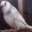

In [46]:
visualize(inp_for_class[0][1015].cpu().detach().clamp(0,1), reshape=True)

In [ ]:
visualize((inp)[0].cpu().detach().clamp(0,1), reshape=True)

In [ ]:
visualize(dataset[3][0][0].cpu().detach())

In [ ]:
visualize(dataset[1][0][0].cpu().detach())

In [ ]:
a = torch.rand(3,3)
a

In [ ]:
a[[0,1,2],[0,1,0]]

In [ ]:
beta_1 = 10
beta_2 = 1
for i in range(10000):
    optimizer.zero_grad()
    pred = model((inp*source_image).clamp(0,1))
    inp_var = torch.mean((inp - torch.mean(inp))**2)
    excess_perturb = torch.sum(relu(inp - 1.3)) + torch.sum(relu(0.3 - inp))
    loss = loss_fn(pred, target_class)
    loss = loss + beta_1*inp_var
    loss = loss + beta_2*excess_perturb
    loss.backward()
    optimizer.step()
    probs = softmax(pred)
    if torch.max(probs) > 0.9 and torch.argmax(probs) == target_class[0]:
        break
    if i % 1000 == 0:
        print(torch.max(probs), torch.argmax(probs))

In [ ]:
a = torch.Tensor([1,2,3,4,5])

In [ ]:
a[[1,4,3]]

In [1]:
import pickle

with open('./cifar10_at_source_target_actual.pkl', 'rb') as fp:
    a = pickle.load(fp)

In [7]:
fig, axs = plt.subplots(10,10, figsize=(20,2)) 
_ = [axarr[i].imshow(a[1][i, 0]) for i in range(10)]
_ = [axarr[i].set_title(classes[i]) for i in range(10)]

(10, 1, 32, 32, 3)

In [32]:
torch.argmax(at_model.model(torch.Tensor(a[0]).flatten(end_dim=1)), dim=-1).reshape(10,9)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 3, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 5],
        [3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 6, 4, 4, 4],
        [5, 5, 6, 5, 5, 6, 5, 5, 5],
        [6, 6, 6, 6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8, 8, 8, 8],
        [9, 9, 2, 3, 9, 9, 9, 9, 9]])

In [ ]:
beta_1 = 10
beta_2 = 1
for i in range(10000):
    optimizer.zero_grad()
#     pred = model(inp*mask + source_image*(1-mask))
    pred = model(inp*source_image)
    inp_var = torch.mean((inp - torch.mean(inp))**2)
    excess_perturb = torch.sum(relu(inp - 1.3)) + torch.sum(relu(0.3 - inp))
    loss = loss_fn(pred, target_class)
    loss = loss + beta_1*inp_var
    loss = loss + beta_2*excess_perturb
    loss.backward()
    optimizer.step()
    probs = softmax(pred)
    if torch.max(probs) > 0.9 and torch.argmax(probs) == target_class[0]:
        break
    if i % 1000 == 0:
        print(torch.max(probs), torch.argmax(probs))
#print(inp[0,0,0])

In [ ]:
pred = model(inp*source_image)
probs = softmax(pred)
probs

In [ ]:
pred = model(inp*source_image)

In [ ]:
target_image = torch.ones(inp.shape, device=device)

In [ ]:
visualize((target_image)[0].cpu().detach().clamp(0,1), reshape=True)

In [ ]:
visualize((inp)[0].cpu().detach().clamp(0,1), reshape=True)

In [ ]:
visualize((source_image)[0].cpu().detach(), reshape=True)

In [ ]:
torch.linalg.norm(inp - target_image)

In [ ]:
a = np.array(torch.reshape((inp*source_image - source_image).cpu().detach(), (-1,)))

In [ ]:
inp.requires_grad = False
inp[inp > 1] = 1
inp[inp < 0] = 0

In [ ]:
softmax(model(inp*mask + source_image*(1-mask)))

In [ ]:
visualize(source_image[0].cpu().detach(), reshape=True)

In [ ]:
for b, data in enumerate(dataset):
    if isinstance(data, tuple) or isinstance(data, list):
        inputs = data[0]
    else:
        inputs = data

    assert isinstance(inputs, torch.Tensor)

    inputs = common.torch.as_variable(inputs, False)
    inputs = inputs.permute(0, 3, 1, 2).to(device)

    logits = ccat_model.model(inputs + torch.randn(*inputs.shape).to(device)*0.01)
    #print(torch.argmax(logits, -1))
    print(torch.max(softmax(logits), -1))
    break
data[1]

In [ ]:
pert_inp = inputs + torch.randn(*inputs.shape).to(device)*0.01

In [ ]:
inp = nullspace_attack(dataset, model, 1e-1, 1, 3, 50, device, inp=None)

In [ ]:
visualize(pert_inp[0].cpu())

In [ ]:
a = inputs[0].unsqueeze(0)
# a.requires_grad = True
# b = getattr(at_model.model, 'conv1')(a)
j = torch.autograd.functional.jacobian(getattr(at_model.model, 'conv1'), a)

In [1]:
def measure_width(img, model, index, dir_vec):
    init_confidence = model(img)[index]
    rand_vecs = torch.randn(128, *img.shape)
    rand_vecs = rand_vecs - torch.sum(rand_vecs*dir_vec, dim=-1)*dir_vec
    rand_vecs = rand_vecs/torch.linalg.vector_norm(rand_vecs, dim=-1)
    distances = [0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.1, 1.2, 1.4, 1.6, 1.8, 2]
    confs = []
    for i in distances:
        pert_imgs = img + i*rand_vecs
        pert_confs = model(pert_imgs)[:, index]
        min_confs, max_confs = torch.min(pert_confs), torch.max(pert_confs)
        confs.append([min_confs, max_confs])
    confs = np.array(confs)
    return confs

In [ ]:
def nullspace_attack(dataset, model, stepsize, target_image_index, source_image_index,  iterations, device, order=1, inp=None):
    # target_image = torch.ones(inp.shape, device=device).reshape((-1))
    
    source_image = common.torch.as_variable(dataset[source_image_index][0], False)
    source_image = source_image.permute(0, 3, 1, 2).to(device)
    if inp is None:
        inp = source_image.clone().to(device)
        inp.requires_grad_()
        
    target_image = common.torch.as_variable(dataset[target_image_index ][0], False)
    target_image = target_image.permute(0, 3, 1, 2).to(device)
    
    source_class, target_class = dataset[source_image_index][1][0] , dataset[target_image_index][1][0]
    assert dataset[source_image_index][1][0] != dataset[target_image_index][1][0]
    print("Source:", classes[dataset[source_image_index][1][0]] , "Target", classes[dataset[target_image_index][1][0]])
    
    def func(inp):
        pred = model((inp).clamp(0,1))
        probs = softmax(pred)
        return probs[0,[source_class]]
    
    pred = model(inp.clamp(0,1))
    probs = softmax(pred)
    print("Initially: ",torch.max(probs), torch.argmax(probs), torch.linalg.norm(inp.clamp(0,1) - target_image.clamp(0,1)))
    for i in range(iterations):
        #optimizer.zero_grad()
        probs = func(inp)
        J = torch.autograd.functional.jacobian(func, inp)
    #     loss = loss_fn(pred, target_class)
        J = J.reshape((prod(J.shape[:2]), prod(J.shape[2:])))
        v = target_image.flatten() - inp.flatten()
        if order == 1:
            delta = torch.matmul(J, v)
            if delta[0] >= 0:
                null_vec = v
            else:
                null_vec = get_nullspace_projection(J, v).reshape(inp.shape)
        elif order == 2:
            null_vec = get_second_order_nullspace_projection(J, H, target_image.reshape((-1)) - inp.reshape((-1))).reshape(inp.shape)
        inp = inp + stepsize*null_vec
#         if i%100 == 0:
        print(i, probs, stepsize*torch.linalg.norm(null_vec))
    pred = model(inp.clamp(0,1))
    probs = softmax(pred)
    print(target_image.shape)
    print("Finally: ",torch.max(probs), classes[torch.argmax(probs)], loss_fn_alex(target_image.cpu(), inp.cpu()))
    return inp

In [ ]:
def test(model, testset, cuda=False, return_labels=False):
    """
    Test a model on a clean or adversarial dataset.

    :param model: model
    :type model: torch.nn.Module
    :param testset: test set
    :type testset: torch.utils.data.DataLoader
    :param cuda: use CUDA
    :type cuda: bool
    :param return_labels: whether to additionally return labels
    :type return_labels: bool
    """

    assert model.training is False
    assert len(testset) > 0
    assert isinstance(testset, torch.utils.data.DataLoader)
    assert isinstance(testset.sampler, torch.utils.data.SequentialSampler)
    assert (cuda and common.torch.is_cuda(model)) or (not cuda and not common.torch.is_cuda(model))

    probabilities = None
    labels = None

    # should work with and without labels
    for b, data in enumerate(testset):
        if isinstance(data, tuple) or isinstance(data, list):
            inputs = data[0]
        else:
            inputs = data

        if return_labels is True:
            assert len(data) >= 2
            labels = common.numpy.concatenate(labels, data[1].numpy())

        assert isinstance(inputs, torch.Tensor)

        inputs = common.torch.as_variable(inputs, cuda)
        inputs = inputs.permute(0, 3, 1, 2)

        logits = model(inputs)
        probabilities_ = torch.nn.functional.softmax(logits, dim=1).detach().cpu().numpy()
        probabilities = common.numpy.concatenate(probabilities, probabilities_)

        progress(b, len(testset))

    assert probabilities.shape[0] == len(testset.dataset)

    if return_labels:
        return probabilities, labels
    else:
        return probabilities

In [26]:
import pickle
with open('./cifar10_at_dist.pkl', 'rb') as fp:
    cifar10_at_dist = pickle.load(fp).squeeze()
with open('./cifar10_normal_dist.pkl', 'rb') as fp:
    cifar10_normal_dist = pickle.load(fp).squeeze()
with open('./mnist_normal_dist.pkl', 'rb') as fp:
    mnist_normal_dist = pickle.load(fp).squeeze()
with open('./mnist_msd_dist.pkl', 'rb') as fp:
    mnist_msd_dist = pickle.load(fp).squeeze()
with open('./mnist_ccat_dist.pkl', 'rb') as fp:
    mnist_ccat_dist = pickle.load(fp).squeeze()
with open('./cifar10_msd_dist.pkl', 'rb') as fp:
    cifar10_msd_dist = pickle.load(fp).squeeze()
with open('./cifar10_ccat_dist.pkl', 'rb') as fp:
    cifar10_ccat_dist = pickle.load(fp).squeeze()
with open('./mnist_at_dist.pkl', 'rb') as fp:
    mnist_at_dist = pickle.load(fp).squeeze()


In [2]:
with open('./cifar10_labels.pkl', 'rb') as fp:
    a = pickle.load(fp)

In [3]:
masks = [a == i for i in range(10)]

In [27]:
import numpy as np
dist = mnist_ccat_dist
dist_per_class = np.stack([dist[:, mask] for mask in masks])

hits = dist_per_class < 0.03

hits.mean(-1)[~np.eye(10, dtype=np.bool)].mean()

0.028755555555555555

In [17]:
hits.shape

(10, 10, 1000)

In [20]:
from matplotlib import pyplot as plt
import numpy as np
# from pandas import *

classes = ['airplane',
                'automobile',
                'bird',
                'cat',
                'deer',
                'dog',
                'frog',
                'horse',
                'ship',
                'truck']

classes = list([str(x) for x in range(10)])


values = hits.mean(-1).transpose()
vals = np.around(values,2)
norm = plt.Normalize(vals.min()-1, vals.max()+1)
colours = plt.cm.hot(vals)


In [21]:
values

array([[0.724, 0.755, 0.698, 0.724, 0.713, 0.717, 0.72 , 0.685, 0.709,
        0.733],
       [0.475, 0.448, 0.46 , 0.459, 0.427, 0.476, 0.448, 0.477, 0.43 ,
        0.429],
       [0.589, 0.581, 0.597, 0.594, 0.596, 0.596, 0.605, 0.582, 0.589,
        0.623],
       [0.634, 0.653, 0.595, 0.625, 0.633, 0.622, 0.624, 0.604, 0.643,
        0.625],
       [0.731, 0.728, 0.766, 0.716, 0.739, 0.728, 0.74 , 0.721, 0.748,
        0.751],
       [0.928, 0.94 , 0.925, 0.905, 0.92 , 0.919, 0.928, 0.907, 0.925,
        0.925],
       [0.84 , 0.84 , 0.815, 0.82 , 0.829, 0.836, 0.841, 0.82 , 0.817,
        0.826],
       [0.447, 0.408, 0.436, 0.446, 0.439, 0.425, 0.41 , 0.431, 0.433,
        0.429],
       [0.793, 0.841, 0.79 , 0.787, 0.802, 0.802, 0.802, 0.777, 0.809,
        0.827],
       [0.726, 0.739, 0.679, 0.717, 0.734, 0.707, 0.718, 0.69 , 0.734,
        0.726]])

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

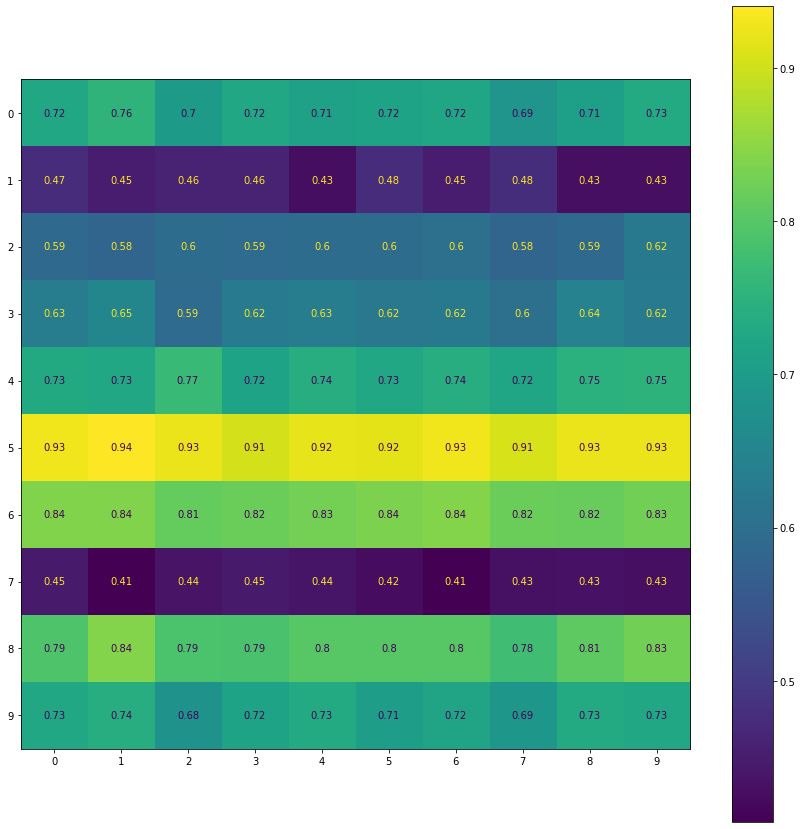

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=values, display_labels=classes)
# disp.ax.set_title("CIFAR10 AT")
fig, ax = plt.subplots(figsize=(15, 15))
disp.plot(ax=ax)
# plt.colorbar()
# cbar.remove()
plt.xlabel('');plt.ylabel(''); 
plt.savefig('./at_mnist_hits.pdf')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


data = hits.mean(-1)

columns = classes
rows = classes

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      cellColours=colours,
                      colLabels=columns,
                      loc='center')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

In [69]:
hits.mean(-1)[~np.eye(10, dtype=np.bool)].mean()

0.8858000000000001

In [19]:
(cifar10_normal_dist[:,:,0][cifar10_normal_dist[:,:,0] > 0] < 0.02).mean()

0.9222122890410361

In [20]:
(cifar10_at_dist[:,:,0][cifar10_at_dist[:,:,0] > 0] < 0.02).mean()

0.44052742313393584

In [21]:
(cifar10_msd_dist[:,:,0][cifar10_msd_dist[:,:,0] > 0] < 0.02).mean()

0.3760537359450895

In [6]:
a = a.squeeze()
for i in range(len(a)):
    l = (a[i][:,0] > a[i][:,1]).astype(int)
    print(l.sum()/len(l))

0.0511
0.0169
0.0521
0.0391
0.026
0.0378
0.061
0.0409
0.0361
0.0271


In [8]:
import torch
a = torch.rand(2,1,4)

In [11]:
a

tensor([[[0.8681, 0.4397, 0.4158, 0.4070]],

        [[0.5783, 0.3962, 0.2310, 0.6196]]])

In [13]:
a.repeat(2,2,4)

tensor([[[0.8681, 0.4397, 0.4158, 0.4070],
         [0.8681, 0.4397, 0.4158, 0.4070]],

        [[0.5783, 0.3962, 0.2310, 0.6196],
         [0.5783, 0.3962, 0.2310, 0.6196]]])